
# Разработка модели предсказания результатов госэкзамена по математике для каждого ученика школы.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 


## Описания данных.

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


## Раздел импорта и функций.

In [1655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings

#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [1656]:
# функция поиска выбросов
def outlier(х):
    perc25=х.quantile(0.25)
    perc75=х.quantile(0.75)
    IQR= perc75 - perc25
    return ('25-й перцентиль: {},'.format(perc25)[:-1], '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [1657]:
# функция замены пробелов в данных на медиану
def fill_median(col):
    mediana = stud_math[col].median()
    stud_math.loc[(pd.isna(stud_math[col])), col] = mediana    

In [1658]:
# функция замены пробелов в данных на моду
def fill_mode(col):
    mode = stud_math[col].describe()['top']
    stud_math.loc[(pd.isna(stud_math[col])), col] = mode

In [1659]:
#функция боксплот
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=stud_math[column], y=stud_math['score'], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [1660]:
# Обзорная функция краткого анализа данных в столбце
def Check_data(x):
    print('Обзор даных для:', x.name)
    print(x.value_counts())
    print(x.describe())
    print('пропущено значений:',x.isnull().sum())
    x.hist(bins=10)

In [1661]:
# Тесть Стьюдента
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            

## Чтение исходных данных.

In [1662]:
# Чтение исходных данных
stud_math = pd.read_csv('stud_math.csv')
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Проанализируем пробелы в данных:

<AxesSubplot:>

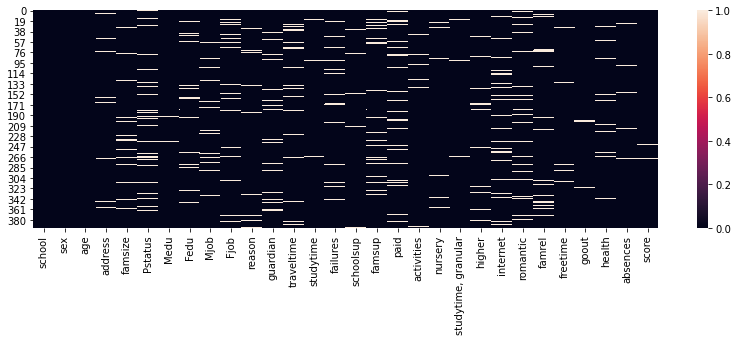

In [1663]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.heatmap(stud_math.isnull())

In [1664]:
print('отсутствует значений:', stud_math.isnull().sum().sum(),'(', round(stud_math.isnull().sum().sum()*10/1185), '%)')

отсутствует значений: 565 ( 5 %)


In [1665]:
stud_math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Приблизительно 5% данных отсутствуют.
Возможно, некоторые пробелы в данных стоит заместить медианными значениями - потребуется дополнительный анализ.

#  Первичная обработка и подготовка данных.


Произведем статистический тест Стьюдента на неочищенных исходных данных:

In [1666]:
for data in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
             'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 
             'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
             get_stat_dif(data)

Найдены статистически значимые различия для колонки Mjob


Видим,что всего один параметр представляет интерес. Попробуем улучшить данные для построения модели.

## Проанализируем главный значимый признак для анализа - score.

Обзор даных для: score
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
пропущено значений: 6
('25-й перцентиль: 40.0', '75-й перцентиль: 70.0,', 'IQR: 30.0, ', 'Границы выбросов: [-5.0, 115.0].')


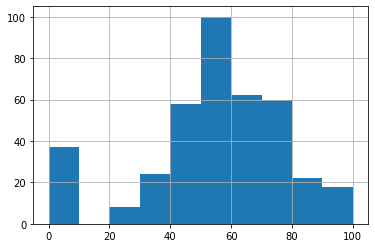

In [1667]:
Check_data(stud_math.score)
print(outlier(stud_math.score))

Обнаружено:

37 значений с оценкой 0. Анализ на выбросы показал, что даже оценки - 0 можно принять для анализа. Однако оценки 0 находятся за пределами нормальго распределения и в дальнейшем проанализируем эти данные отдельно.

6 значений Nan. Можно удалить строк без оценки, но предварительно посмотрим на эти строки:

In [1668]:
display(stud_math.loc[stud_math.score.isna()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [1669]:
# Удаляем строки без оценок - нет смысла дальше анализировать
stud_math.drop(stud_math[stud_math.score.isna()].index, inplace=True)
stud_math.reset_index(drop=True, inplace=True)


Дальнейший анализ score продолжим после рассмотрения других столбцов и восстановления данных.

## Анализ studytime, granular.

В данных обнаружен  столбец studytime, granular - переименуем его для удобства и исследуем.

Обзор даных для: st_gran
-6.0     189
-3.0     103
-9.0      63
-12.0     27
Name: st_gran, dtype: int64
count    382.000000
mean      -6.109948
std        2.541716
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: st_gran, dtype: float64
пропущено значений: 7
('25-й перцентиль: -6.0', '75-й перцентиль: -3.0,', 'IQR: 3.0, ', 'Границы выбросов: [-10.5, 1.5].')


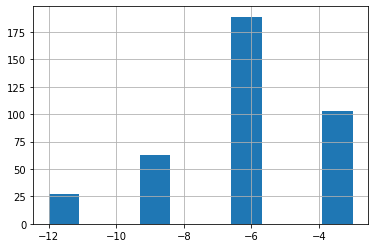

In [1670]:
stud_math.rename(columns={'studytime, granular': 'st_gran'}, inplace=True)

Check_data(stud_math.st_gran)
print(outlier(stud_math.st_gran))

Можно сделать вывод, что значения -12 являются выбросами.
Этот столбец требует дальнейшего анализа в дальнейшем.
Восстановим пропущенные данные медианным значением:

In [1671]:
#Проверка и просмотр строк с пропущенными данными во время отладки....
#print('потеряно значений:',stud_math.st_gran.isna().sum())
#display(stud_math.loc[stud_math.st_gran.isna()])

#Вычисляем медиану и заполняем пробелы
m1 = stud_math.st_gran.median()
stud_math.st_gran = stud_math.st_gran.apply(lambda x: m1 if pd.isna(x) else x)


## Анализ данных school.

Обзор даных для: school
GP    344
MS     45
Name: school, dtype: int64
count     389
unique      2
top        GP
freq      344
Name: school, dtype: object
пропущено значений: 0


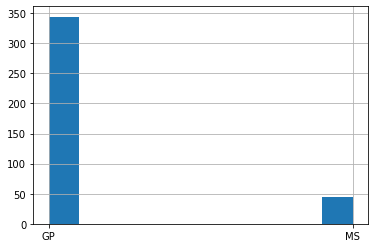

In [1672]:
# Проверим значения в столбце school
Check_data(stud_math.school)



Понимаем, что в файле приведены данные учеников 2х школ. Пропущенных или неопределенных данных нет. В школе GP учится 88.4% учащихся.

Необходимо будет учитывать при анализе эти школы отдельно - возможно, влияет качество преподавания математики в школе - проверим эту гипотезу:

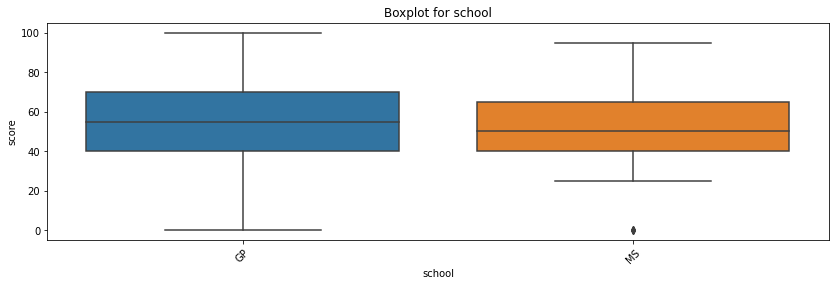

In [1673]:
get_boxplot('school')

по боксплоту не видим существенных различий в качестве обучения в этих школах.

## Анализ возраста учеников.

Обзор даных для: age
16    103
17     98
15     82
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64
count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
пропущено значений: 0
('25-й перцентиль: 16.0', '75-й перцентиль: 18.0,', 'IQR: 2.0, ', 'Границы выбросов: [13.0, 21.0].')


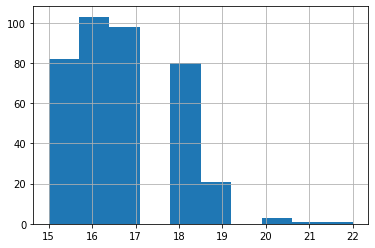

In [1674]:
#анализ возраста учеников
Check_data(stud_math.age)
print(outlier(stud_math.age))

В данных всего 5 учеников старше 19 лет, причем возраст 22 года за пределами границы выбросов - удалять выброс не вижу смысла. Пропущенных значений нет.

## Анализ образования отца Fedu.

Обзор даных для: Fedu
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64
count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
пропущено значений: 24
('25-й перцентиль: 2.0', '75-й перцентиль: 3.0,', 'IQR: 1.0, ', 'Границы выбросов: [0.5, 4.5].')


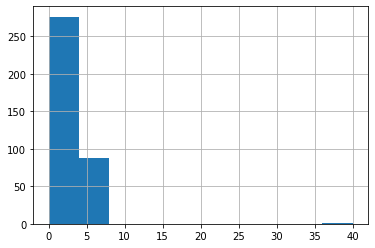

In [1675]:
#анализ образования отца Fedu
#(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Check_data(stud_math.Fedu)
print(outlier(stud_math.Fedu))

Сразу замечаем выброс - 40. Считаем опечаткой и заменяем на 4.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Обзор даных для: Fedu
2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64
count    365.000000
mean       2.528767
std        1.088082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
пропущено значений: 24
('25-й перцентиль: 2.0', '75-й перцентиль: 3.0,', 'IQR: 1.0, ', 'Границы выбросов: [0.5, 4.5].')


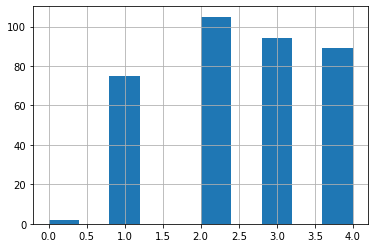

In [1676]:
#посмотрим на данные
display(stud_math.loc[stud_math['Fedu']==40])
#скорее всего опечатка, исправляем
stud_math.Fedu=stud_math.Fedu.apply(lambda x: 4 if x==40 else x)


#повторный анализ столбца образования отца Fedu
#(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Check_data(stud_math.Fedu)
print(outlier(stud_math.Fedu))

Данные корректные, зафиксированы выбросв с уровнем образования 0. 

Посмотрим на пропуски данных Fedu:

In [1677]:
#Посмотрим на отсутствующие данные Fedu 
print('потеряно значений:',stud_math.Fedu.isna().sum())
#display(stud_math.loc[stud_math.Fedu.isna()])


потеряно значений: 24


## Анализ образования матери Medu.

Обзор даных для: Medu
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64
count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
пропущено значений: 3
('25-й перцентиль: 2.0', '75-й перцентиль: 4.0,', 'IQR: 2.0, ', 'Границы выбросов: [-1.0, 7.0].')


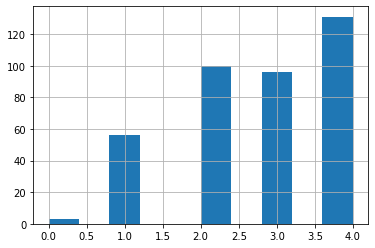

In [1678]:
#анализ образования матери Medu
#(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Check_data(stud_math.Medu)
print(outlier(stud_math.Medu))


Данные Medu  — образование матери - достаточно корректные, имеются пропуски, возможно следует их заменить медианой.
Проверим гипотезу наличия сильной корреляции между образованием отца и матери.


age          -0.152148
Medu          0.621981
Fedu          1.000000
traveltime   -0.132036
studytime     0.017306
failures     -0.273286
st_gran      -0.017207
famrel       -0.013287
freetime     -0.017263
goout         0.050997
health        0.018624
absences      0.020970
score         0.130923
dtype: float64

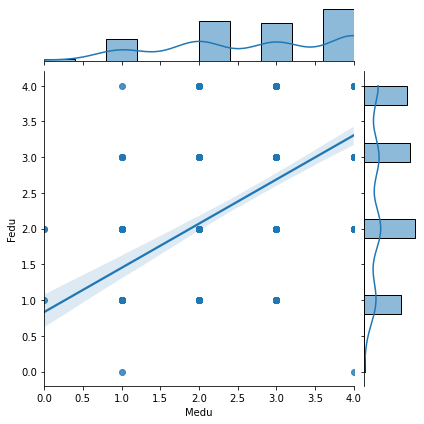

In [1679]:
#sns.pairplot(stud_math, kind = 'reg')
#g=sns.PairGrid(stud_math)
#g.map(plt.scatter)
sns.jointplot(x='Medu', y='Fedu', data=stud_math, kind='reg')
stud_math.corrwith(stud_math.Fedu)

Присутствует существенная корреляция между уровнями образования Fedu и Medu.
Корреляцию можно описать в упрощенной форме как: Fedu=0.5*Medu+1 или Medu=2*Fedu-2 

с граничным условием 4 - максимальный уровень и 0- минимальный уровень.

In [1680]:
#Посмотрим на данные и восстанавливаем отсутствующие данные Medu 
print('потеряно значений:',stud_math.Medu.isna().sum())
display(stud_math.loc[stud_math.Medu.isna()])

потеряно значений: 3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
238,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


Попробуем восстановить данные Medu - используя данные Fedu (в данном наборе данных нам повезло и отсутствуют строки, где одновременно нет Medu и  Fedu ):

In [1681]:
def calc1(x):
    y = x*2-2
    if y < 0:
        y = 0
    elif y > 4:
        y = 4
    return y

stud_math['Medu']=stud_math.apply(lambda x: calc1(x['Fedu']) if pd.isna(x['Medu']) else x['Medu'], axis=1)


#ниже вариант работает, но только без граничных условий - не универсальный, может как-то возможно его реализовать?
#stud_math.Medu = stud_math.Medu.fillna(stud_math.Fedu*2-2)


Попробуем восстановить данные Fedu - используя данные Medu (в данном наборе данных отсутствуют данные, где одновременно нет Medu и Fedu ):

In [1682]:
def calc2(x):
    y = round(x*0.5+1)
    if y > 4:
        y = 4
    return y

stud_math['Fedu']=stud_math.apply(lambda x: calc2(x['Medu']) if pd.isna(x['Fedu']) else x['Fedu'], axis=1)

In [1683]:
#проверка работоспособности
display(stud_math.loc[stud_math.Fedu.isna()])
#display(stud_math.loc[21])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score


age          -0.151045
Medu          0.622863
Fedu          1.000000
traveltime   -0.126219
studytime     0.013630
failures     -0.276451
st_gran      -0.013577
famrel       -0.007645
freetime     -0.019321
goout         0.046873
health        0.017135
absences      0.022784
score         0.134643
dtype: float64

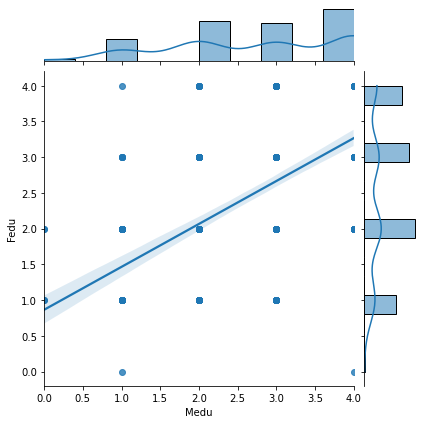

In [1684]:
sns.jointplot(x='Medu', y='Fedu', data=stud_math, kind='reg')
stud_math.corrwith(stud_math.Fedu)

Видим, что данные восстановлены и корреляция выросла всего на 0.0009

## Анализ address и traveltime.

### Анализ traveltime.

Обзор даных для: traveltime
1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64
count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
пропущено значений: 28
('25-й перцентиль: 1.0', '75-й перцентиль: 2.0,', 'IQR: 1.0, ', 'Границы выбросов: [-0.5, 3.5].')


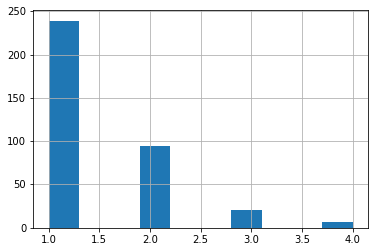

In [1685]:
# Проверим значения в столбце traveltime
Check_data(stud_math.traveltime)
print(outlier(stud_math.traveltime))

Предварительный анализ показал наличие выбросов для traveltime =4. Однако по распределению видим, что значения корректны и удаление выбросов нецелесообразно для анализа данных.

28 строк с отсутствием времени на дорогу.

Проверим распределение времени на дорогу по разным школам. 


<AxesSubplot:>

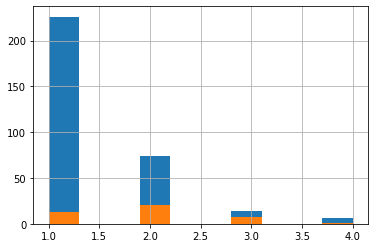

In [1686]:
stud_math.loc[stud_math.school=='GP'].traveltime.hist(bins=10)
stud_math.loc[stud_math.school=='MS'].traveltime.hist(bins=10)

Замечаем отличие в распределение для школы MS. Проверим данные для школы MS:

Обзор даных для: traveltime
2.0    20
1.0    13
3.0     7
4.0     1
Name: traveltime, dtype: int64
count    41.000000
mean      1.902439
std       0.768273
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: traveltime, dtype: float64
пропущено значений: 4
('25-й перцентиль: 1.0', '75-й перцентиль: 2.0,', 'IQR: 1.0, ', 'Границы выбросов: [-0.5, 3.5].')


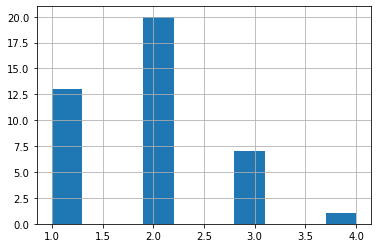

In [1687]:
Check_data(stud_math.loc[stud_math.school=='MS'].traveltime)
print(outlier(stud_math.loc[stud_math.school=='MS'].traveltime))

для восстановления данных для школы MS медиана 2
для школы GP медиана 1

### Анализ address.

Обзор даных для: address
U    291
R     83
Name: address, dtype: int64
count     374
unique      2
top         U
freq      291
Name: address, dtype: object
пропущено значений: 15


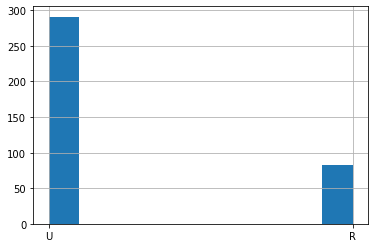

In [1688]:
# Проверим значения в столбце address
Check_data(stud_math.address)

Проверим гипотезу взаимосвязи времени на дорогу с местом проживания ученика (город/пригород) по серии гистограмм.

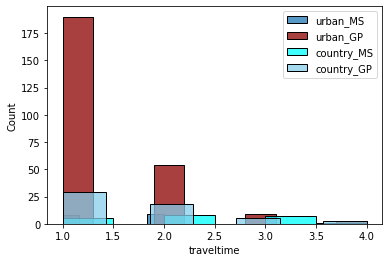

In [1689]:
test_df = stud_math[['address', 'traveltime','school']]
#удалили все строки с отсутствующими значениями
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)

sns.histplot(test_df.loc[test_df.school=='MS'][test_df.address=='U'].traveltime, label='urban_MS')
sns.histplot(test_df.loc[test_df.school=='GP'][test_df.address=='U'].traveltime, label='urban_GP',color='darkred')
sns.histplot(test_df.loc[test_df.school=='MS'][test_df.address=='R'].traveltime, label='country_MS',color='aqua')
sns.histplot(test_df.loc[test_df.school=='GP'][test_df.address=='R'].traveltime, label='country_GP',color='skyblue')

plt.legend()


Видимой зависимости   traveltime от address( места проживания город-пригород) на гистограммах не прослеживается.

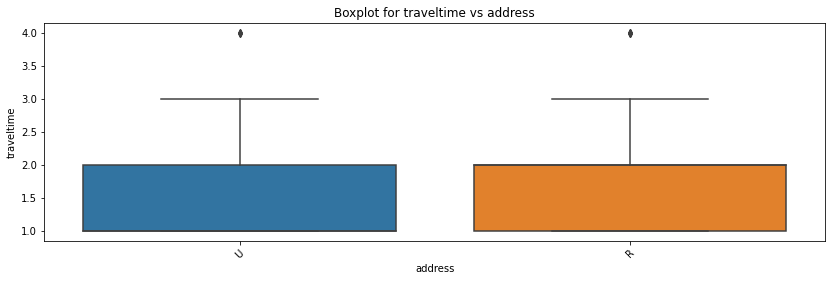

In [1690]:
# Построим боксплот
    
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x=stud_math['address'], y=stud_math['traveltime'], ax=ax)
plt.xticks(rotation=45)
ax.set_title('Boxplot for traveltime vs address')
plt.show()


Вывод: четкой зависимости traveltime от места проживания (Город-пригород) не прослеживается.

Зависимость для школы MS отличается, поэтому посмотрим ее отдельно, зависит ли traveltime для учеников школы MS от места проживания?

Обзор даных для: traveltime
2.0    9
1.0    8
Name: traveltime, dtype: int64
count    17.000000
mean      1.529412
std       0.514496
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: traveltime, dtype: float64
пропущено значений: 1
('25-й перцентиль: 1.0', '75-й перцентиль: 2.0,', 'IQR: 1.0, ', 'Границы выбросов: [-0.5, 3.5].')


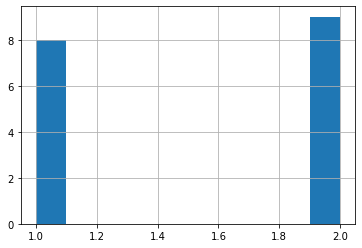

In [1691]:
#display(stud_math.loc[(stud_math.school=='MS') & (stud_math.address=='U')])

Check_data(stud_math.loc[(stud_math.school=='MS') & (stud_math.address=='U')].traveltime)
print(outlier(stud_math.loc[(stud_math.school=='MS') & (stud_math.address=='U')].traveltime))

Обзор даных для: traveltime
2.0    8
3.0    7
1.0    5
4.0    1
Name: traveltime, dtype: int64
count    21.000000
mean      2.190476
std       0.872872
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: traveltime, dtype: float64
пропущено значений: 2
('25-й перцентиль: 2.0', '75-й перцентиль: 3.0,', 'IQR: 1.0, ', 'Границы выбросов: [0.5, 4.5].')


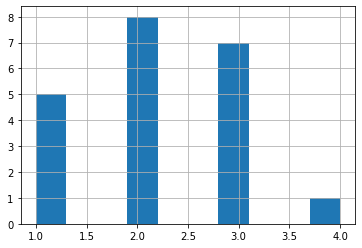

In [1692]:
Check_data(stud_math.loc[(stud_math.school=='MS') & (stud_math.address=='R')].traveltime)
print(outlier(stud_math.loc[(stud_math.school=='MS') & (stud_math.address=='R')].traveltime))

Из анализа видно, что медиана - traveltime для школы MS не зависит от адреса проживания и равна 2.

###  Восстановление traveltime.

Восстановим traveltime для учеников школы MS используя медиану -2

In [1693]:
# Восстановление данных медианой

m1=stud_math[stud_math.school=='MS'].traveltime.median()
stud_math.loc[(stud_math['school']=='MS') & (pd.isna(stud_math['traveltime'])), 'traveltime'] = m1



Восстановим traveltime для школы GP используя медиану -1

In [1694]:
m1=stud_math[stud_math.school=='GP'].traveltime.median()
stud_math.loc[(stud_math['school']=='GP') & (pd.isna(stud_math['traveltime'])), 'traveltime'] = m1


###  Восстановление address.

Сформируем тестовый датафрейм для проверки гипотезы явной зависимость address от score:

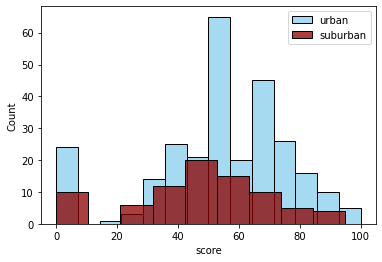

In [1695]:
test_df = stud_math[['address', 'score','reason','traveltime','Medu']]
#удалили все строки с отсутствующими значениями
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)

sns.histplot(test_df.loc[test_df.address=='U'].score, label='urban', color='skyblue')
sns.histplot(test_df.loc[test_df.address=='R'].score, label='suburban', color='darkred')
plt.legend()

Обзор даных для: score
50.0     34
55.0     31
75.0     26
40.0     25
0.0      24
70.0     23
65.0     22
45.0     21
60.0     20
80.0     11
30.0     11
90.0     10
85.0      5
95.0      4
35.0      3
25.0      3
20.0      1
100.0     1
Name: score, dtype: int64
count    275.000000
mean      53.654545
std       22.845257
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
пропущено значений: 0
('25-й перцентиль: 45.0', '75-й перцентиль: 70.0,', 'IQR: 25.0, ', 'Границы выбросов: [7.5, 107.5].')


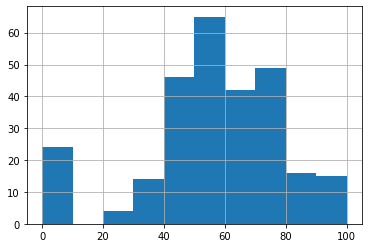

In [1696]:
Check_data(test_df.loc[test_df.address=='U'].score)
print(outlier(test_df.loc[test_df.address=='U'].score))

Обзор даных для: score
50.0    17
0.0     10
55.0     9
65.0     7
40.0     6
60.0     6
35.0     6
80.0     3
25.0     3
30.0     3
70.0     3
45.0     3
75.0     2
90.0     2
95.0     1
85.0     1
Name: score, dtype: int64
count    82.000000
mean     47.195122
std      23.162037
min       0.000000
25%      35.000000
50%      50.000000
75%      60.000000
max      95.000000
Name: score, dtype: float64
пропущено значений: 0
('25-й перцентиль: 35.0', '75-й перцентиль: 60.0,', 'IQR: 25.0, ', 'Границы выбросов: [-2.5, 97.5].')


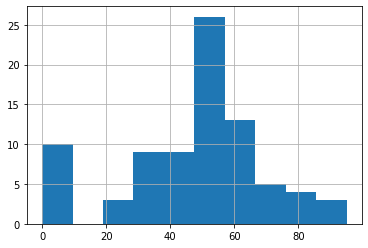

In [1697]:
Check_data(test_df.loc[test_df.address=='R'].score)
print(outlier(test_df.loc[test_df.address=='R'].score))

Результаты анализа паказали нечеткую зависимость address от score и использовать score для прямого восстановления адреса не рекомендую.

In [1698]:
#Проверка и просмотр строк с пропущенными данными во время отладки....
print('потеряно значений:',stud_math.address.isna().sum())
display(stud_math.loc[stud_math.address.isna()])
#stud_math.isnull().sum()


потеряно значений: 15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,0.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,2.0,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
240,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
252,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
288,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0


Считаю, что хорошим критерием для заполнения поля address можно использовать поле reason!

Обзор даных для: reason
course        97
home          84
reputation    71
other         23
Name: reason, dtype: int64
count        275
unique         4
top       course
freq          97
Name: reason, dtype: object
пропущено значений: 0
Обзор даных для: reason
course        33
reputation    28
home          11
other         10
Name: reason, dtype: int64
count         82
unique         4
top       course
freq          33
Name: reason, dtype: object
пропущено значений: 0


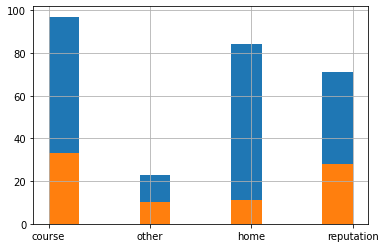

In [1699]:
Check_data(test_df.loc[test_df.address=='U'].reason)
Check_data(test_df.loc[test_df.address=='R'].reason)

Обзор даных для: reason
course        67
home          64
reputation    51
other         19
Name: reason, dtype: int64
count        201
unique         4
top       course
freq          67
Name: reason, dtype: object
пропущено значений: 0
Обзор даных для: reason
course        17
reputation    14
home           4
other          3
Name: reason, dtype: int64
count         38
unique         4
top       course
freq          17
Name: reason, dtype: object
пропущено значений: 0


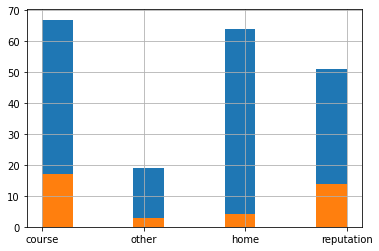

In [1700]:
Check_data(test_df.loc[(test_df.traveltime==1) & (test_df.address=='U')].reason)
Check_data(test_df.loc[(test_df.traveltime==1) & (test_df.address=='R')].reason)

Видим, что такой кретерий повышает достоверность восстановления адреса на 60%


In [1701]:
stud_math.loc[(stud_math.traveltime==1)& (stud_math.reason=='home') & (pd.isna(stud_math['address'])), 'address'] = 'U'

Проверим критерий проживания address относительно уровня образования Medu

Обзор даных для: Medu
4.0    104
2.0     70
3.0     66
1.0     32
0.0      3
Name: Medu, dtype: int64
count    275.000000
mean       2.858182
std        1.086528
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
пропущено значений: 0
Обзор даных для: Medu
3.0    23
2.0    23
1.0    19
4.0    17
Name: Medu, dtype: int64
count    82.000000
mean      2.463415
std       1.067998
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Medu, dtype: float64
пропущено значений: 0


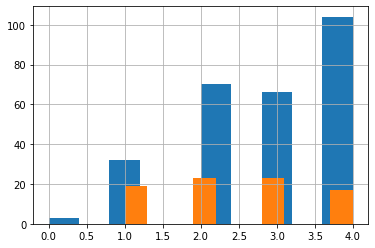

In [1702]:
Check_data(test_df.loc[(test_df.address=='U')].Medu)
Check_data(test_df.loc[(test_df.address=='R')].Medu)

In [1703]:
#Применим этот критерий:
stud_math.loc[(stud_math.Medu>=3) & (pd.isna(stud_math['address'])), 'address'] = 'U'


#оставшиеся 4 потери заполним address = 'R' что почти совпадает с 30%
stud_math.loc[(pd.isna(stud_math['address'])), 'address'] = 'R'

## Анализ failures.

Обзор даных для: failures
0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64
count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
пропущено значений: 22
('25-й перцентиль: 0.0', '75-й перцентиль: 0.0,', 'IQR: 0.0, ', 'Границы выбросов: [0.0, 0.0].')


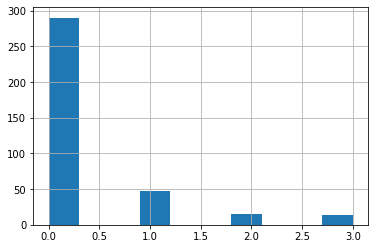

In [1704]:
Check_data(stud_math.failures)
print(outlier(stud_math.failures))
#display(stud_math.loc[stud_math.failures.isna()])

Рассмотрим детально признак failures:

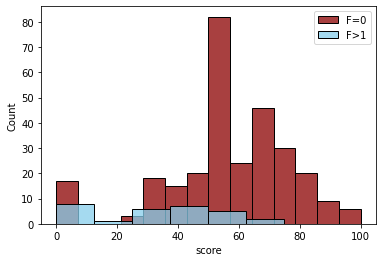

In [1705]:
sns.histplot(stud_math.loc[stud_math.failures==0].score, label='F=0', color='darkred')
sns.histplot(stud_math.loc[stud_math.failures>1].score, label='F>1', color='skyblue')
plt.legend()

На основе этой статистики можно сделать вывод, что в данных с score>70 можно смело поставить failures=0!

In [1706]:
#Применим этот критерий:
stud_math.loc[(stud_math.score>=70) & (pd.isna(stud_math['failures'])), 'failures'] = 0

In [1707]:
#Проверим корреляции с параметром failures
stud_math.corrwith(stud_math.failures)

age           0.211149
Medu         -0.237328
Fedu         -0.272079
traveltime    0.043850
studytime    -0.178748
failures      1.000000
st_gran       0.177136
famrel       -0.039528
freetime      0.088881
goout         0.107250
health        0.084826
absences      0.059950
score        -0.348785
dtype: float64

Создадим тестовый набор данных:

In [1708]:
test_df = stud_math[['age', 'Medu','Fedu', 'studytime','st_gran','goout','score','failures']]
#удалили все строки с отсутствующими значениями
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)

# создадим синтетический критерий образования родителей
test_df['Medu_Fedu']=(test_df['Medu']+test_df['Fedu'])
test_df.corrwith(test_df.failures)

age          0.201621
Medu        -0.230612
Fedu        -0.266451
studytime   -0.181740
st_gran      0.181740
goout        0.122632
score       -0.355316
failures     1.000000
Medu_Fedu   -0.276598
dtype: float64

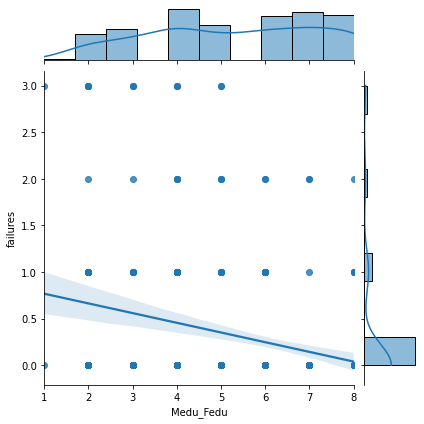

In [1709]:
sns.jointplot(x='Medu_Fedu', y='failures', data=test_df, kind='reg')

Применим  критерий Medu_Fedu>3 failures=0, Medu+Fedu<=3 failures=1:

In [1710]:
#Применим  критерий Medu_Fedu>3 failures=0, Medu+Fedu<=3 failures=1:
stud_math.loc[(stud_math.Medu + stud_math.Fedu > 3) & (pd.isna(stud_math['failures'])), 'failures'] = 0
stud_math.loc[(stud_math.Medu + stud_math.Fedu <= 3) & (pd.isna(stud_math['failures'])), 'failures'] = 1

## Анализ поля higher.

Обзор даных для: higher
yes    350
no      19
Name: higher, dtype: int64
count     369
unique      2
top       yes
freq      350
Name: higher, dtype: object
пропущено значений: 20


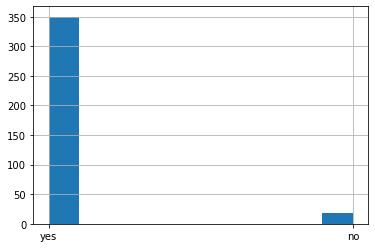

In [1711]:
Check_data(stud_math.higher)

Обзор даных для: score
0.0     6
40.0    3
60.0    3
50.0    3
45.0    2
65.0    1
35.0    1
Name: score, dtype: int64
count    19.000000
mean     33.684211
std      24.767929
min       0.000000
25%       0.000000
50%      40.000000
75%      50.000000
max      65.000000
Name: score, dtype: float64
пропущено значений: 0


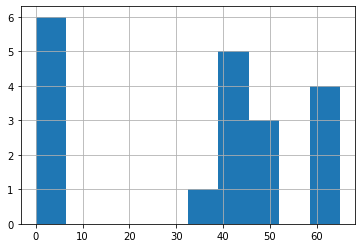

In [1712]:
Check_data(stud_math.loc[stud_math.higher=='no'].score)

95% учеников планирует дальнейшее обучение - поэтому можно заполнить пропущенные данные модой, в данном случае - yes:

In [1713]:
stud_math.loc[pd.isna(stud_math['higher']), 'higher'] = 'yes'

##  Анализ romantic.

Обзор даных для: romantic
no     235
yes    123
Name: romantic, dtype: int64
count     358
unique      2
top        no
freq      235
Name: romantic, dtype: object
пропущено значений: 31


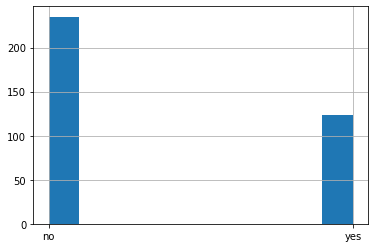

In [1714]:
Check_data(stud_math.romantic)
#Проверка и просмотр строк с пропущенными данными во время отладки....
#display(stud_math.loc[stud_math.romantic.isna()])

romantic=no
Обзор даных для: failures
0.0    196
1.0     26
3.0      9
2.0      4
Name: failures, dtype: int64
count    235.000000
mean       0.259574
std        0.676738
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
пропущено значений: 0
romantic=yes
Обзор даных для: failures
0.0    89
1.0    19
2.0    11
3.0     4
Name: failures, dtype: int64
count    123.000000
mean       0.430894
std        0.790116
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: failures, dtype: float64
пропущено значений: 0


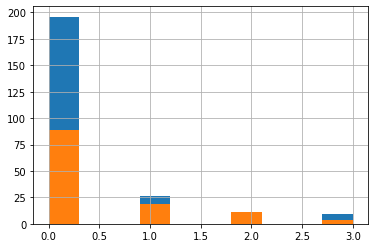

In [1715]:
# Проверим связь между romantic и failures
print('romantic=no')
Check_data(stud_math.loc[(stud_math.romantic=='no')].failures)

print('romantic=yes')
Check_data(stud_math.loc[(stud_math.romantic=='yes')].failures)

Обзор даных для: romantic
no     114
yes     77
Name: romantic, dtype: int64
count     191
unique      2
top        no
freq      114
Name: romantic, dtype: object
пропущено значений: 13
Обзор даных для: romantic
no     121
yes     46
Name: romantic, dtype: int64
count     167
unique      2
top        no
freq      121
Name: romantic, dtype: object
пропущено значений: 18


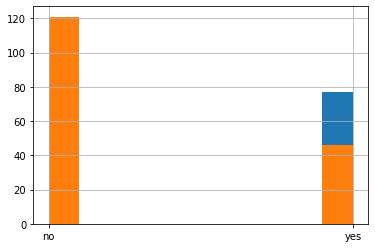

In [1716]:
Check_data(stud_math.loc[stud_math.sex=='F'].romantic)
Check_data(stud_math.loc[stud_math.sex=='M'].romantic)

40% F - romantic и 28% M - romantic

          freetime     goout      score  studytime
romantic                                          
no        3.250000  3.074236  54.574468   2.008658
yes       3.176471  3.106557  47.682927   2.098361


<AxesSubplot:xlabel='romantic'>

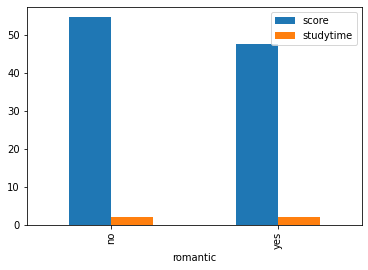

In [1717]:
print(stud_math.pivot_table(values = ['score', 'studytime','freetime','goout'], 
               index = 'romantic', 
               aggfunc = 'mean'))

stud_math.pivot_table(values = ['score', 'studytime'], 
               index = 'romantic', 
               aggfunc = 'mean').plot(kind = 'bar')



Обзор даных для: romantic
no     228
yes    112
Name: romantic, dtype: int64
count     340
unique      2
top        no
freq      228
Name: romantic, dtype: object
пропущено значений: 30
Обзор даных для: romantic
yes    11
no      7
Name: romantic, dtype: int64
count      18
unique      2
top       yes
freq       11
Name: romantic, dtype: object
пропущено значений: 1


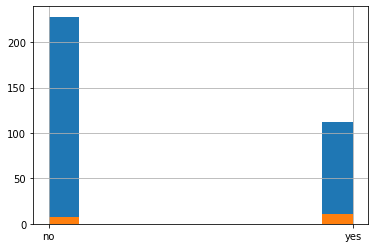

In [1718]:
Check_data(stud_math.loc[stud_math.higher=='yes'].romantic)
Check_data(stud_math.loc[stud_math.higher=='no'].romantic)

 Пробуем применить гипотезу, если score < 45, примем romantic-yes, и соотвественно >45 - romantic-no:

In [1719]:
stud_math.loc[(stud_math.score < 45) & (pd.isna(stud_math['romantic'])), 'romantic'] = 'yes'
stud_math.loc[(stud_math.score >= 45) & (pd.isna(stud_math['romantic'])), 'romantic'] = 'no'

## Анализ goout.

Обзор даных для: goout
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64
count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
пропущено значений: 7


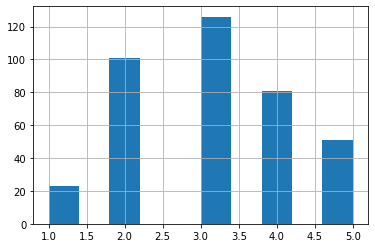

In [1720]:
Check_data(stud_math.goout)
#display(stud_math.loc[stud_math.goout.isna()])

Проверим влияние на другие параметры:

In [1721]:
stud_math.corrwith(stud_math.goout)

age           0.121115
Medu          0.067584
Fedu          0.046873
traveltime    0.037341
studytime    -0.053831
failures      0.097274
st_gran       0.053283
famrel        0.076387
freetime      0.296338
goout         1.000000
health       -0.018026
absences     -0.047954
score        -0.129685
dtype: float64

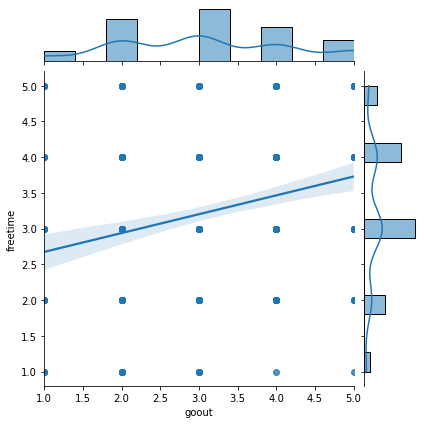

In [1722]:
sns.jointplot(x='goout', y='freetime', data=stud_math, kind='reg')

Применим простую регрессию для восстановления пропущенных goout: для freetime<3 gooout=1; для freetime >=3 goout=freetime+1

In [1723]:
stud_math.loc[(stud_math.freetime < 3) & (pd.isna(stud_math['goout'])), 'goout'] = 1
stud_math.loc[(stud_math.freetime >= 3) & (pd.isna(stud_math['goout'])), 'goout'] = stud_math.freetime+1

## Анализ и востановление данных других параметров.

In [1724]:
#заменим пропущенные значения модой.
for data in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
             'Fjob', 'reason', 'guardian', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
             'romantic' ]:
    fill_mode(data)

        
#заменим пропущенные значения медианой. 'goout'
for data in ['studytime', 'famrel', 'freetime', 'health','absences']:
    fill_median(data) 

## Результат предварительно подготовки данных

Посмотрим на результат восстановления данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

<AxesSubplot:>

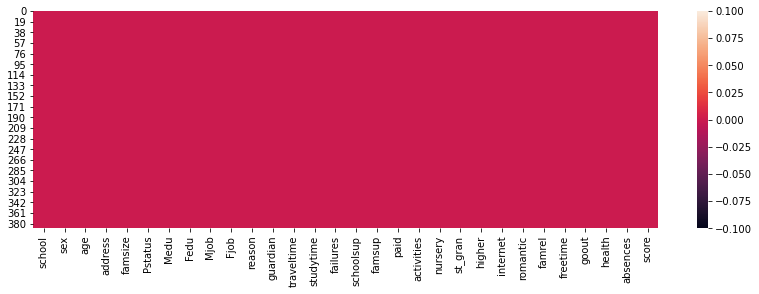

In [1725]:
stud_math.info() 
print('отсутствует значений:', stud_math.isnull().sum().sum(),'(', round(stud_math.isnull().sum().sum()*10/(389*3),1), '%)')

fig, ax = plt.subplots(figsize = (14, 4))
sns.heatmap(stud_math.isnull())

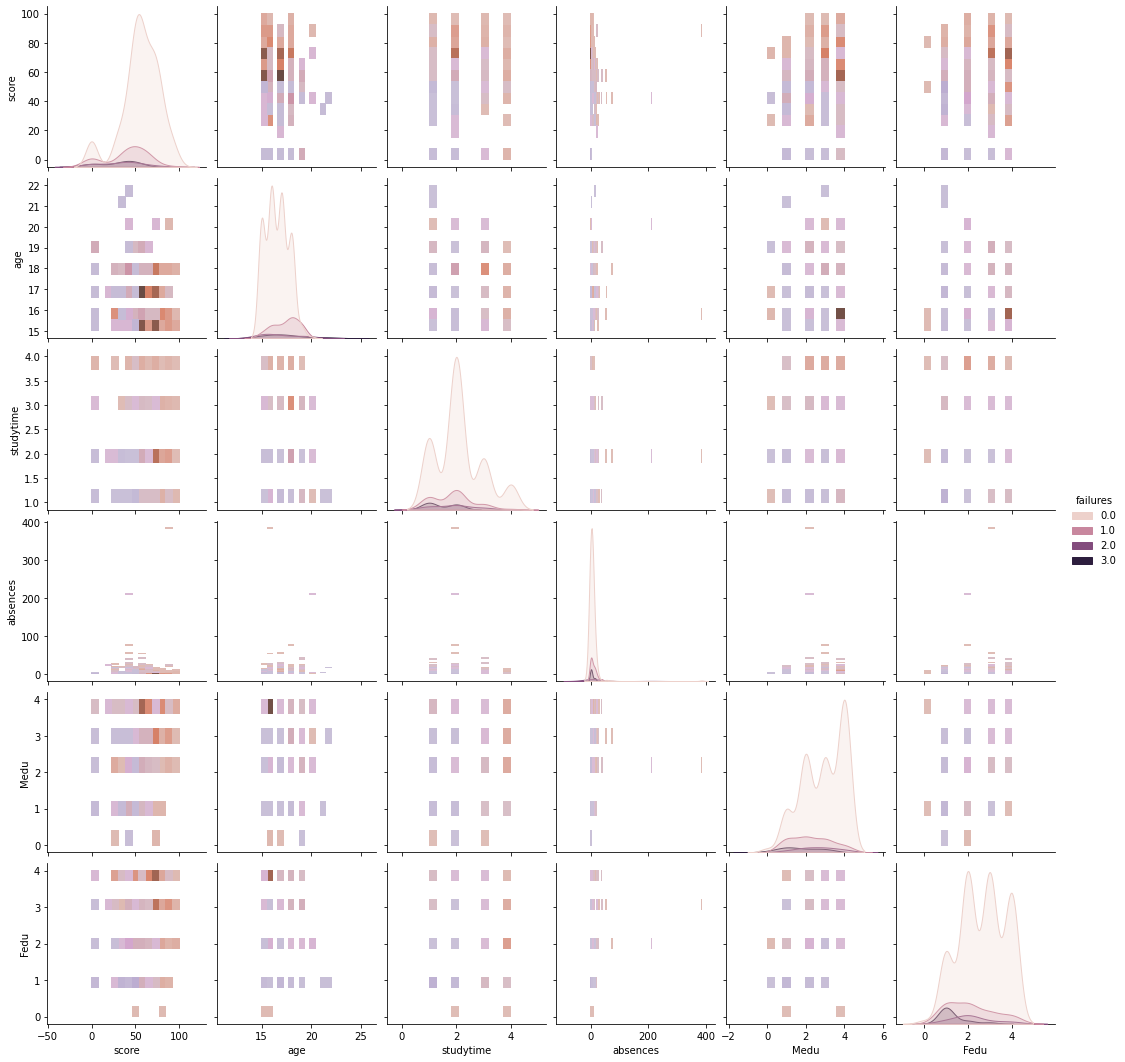

In [1726]:
sns.pairplot(stud_math[['score','age','studytime','absences','romantic','Medu','Fedu','failures']], 
             kind="hist",  diag_kind="kde", hue="failures")

# Номинативные переменные.

## Анализ с boxplot.


Номинативные переменные можно рассмотреть используя бокс-плот(график показывает плотность распределения переменных).
Рассмотрим следующие переменные:

'age', 'Medu', 'Fedu', 'traveltime', 'studytime','school','address'



Выведем различные варианты бокс-плот относительно параметра score:

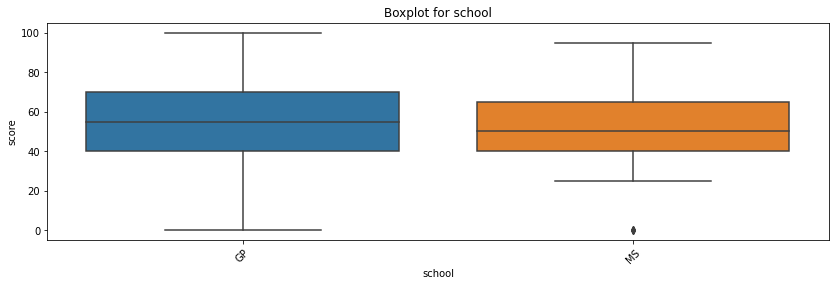

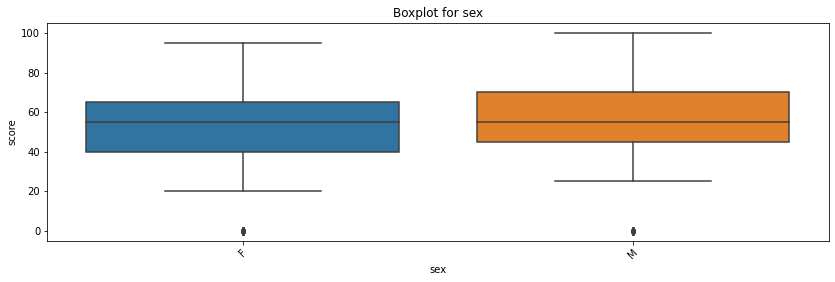

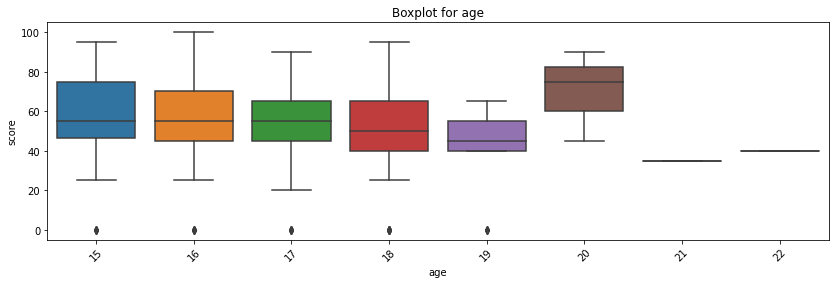

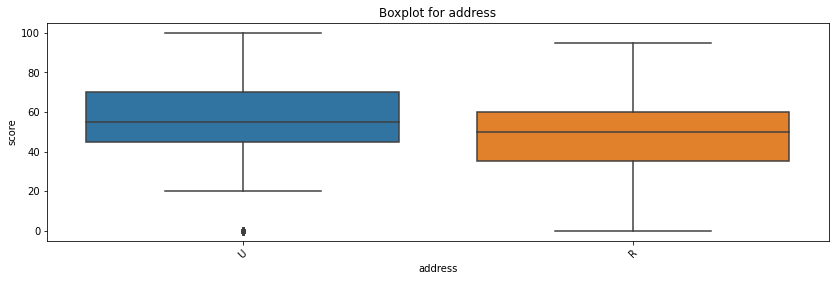

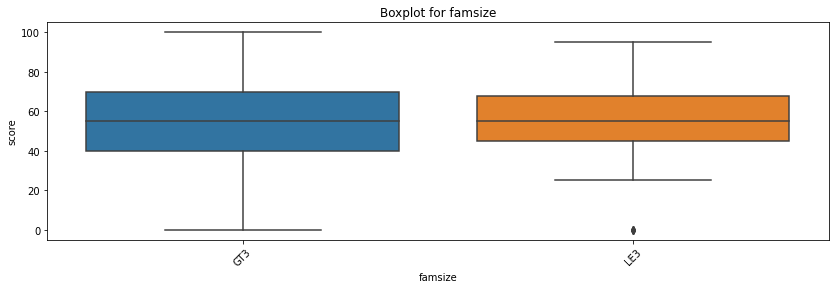

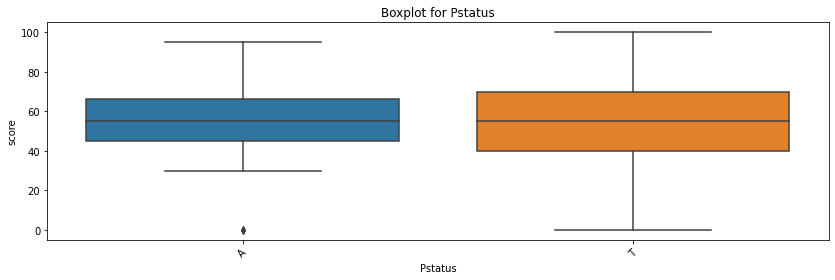

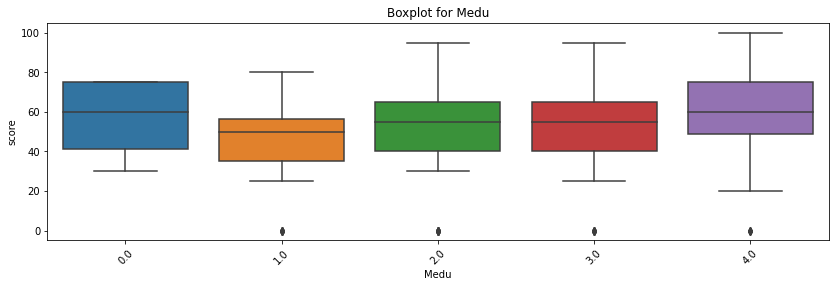

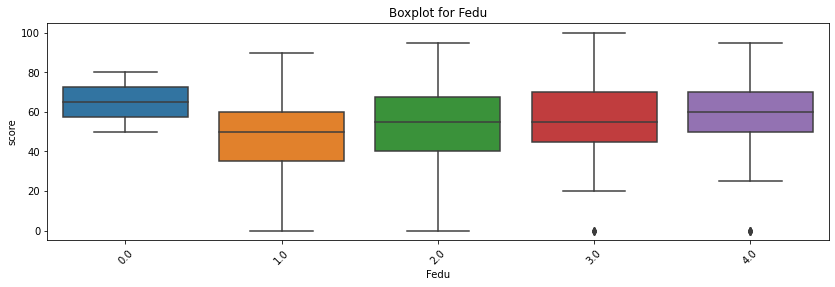

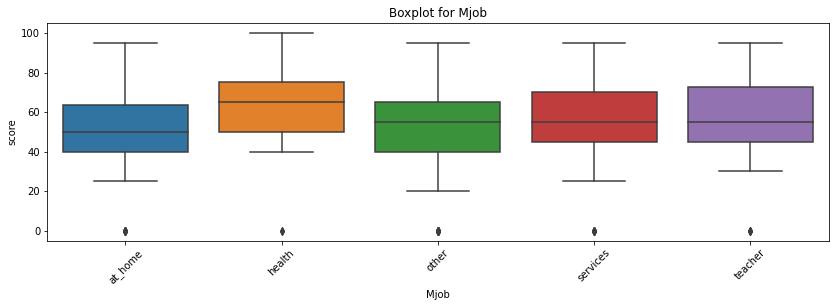

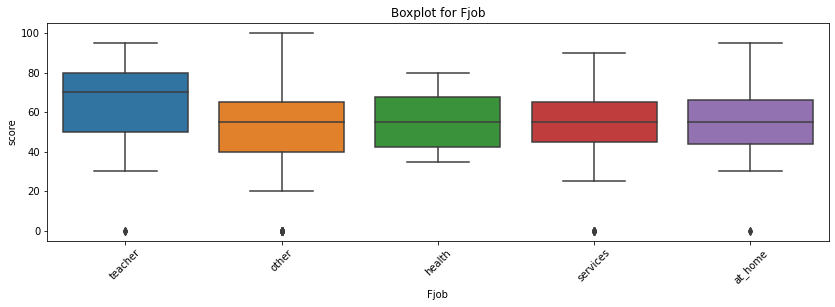

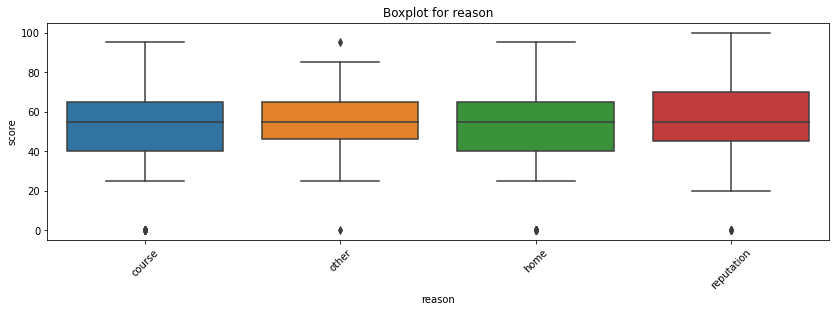

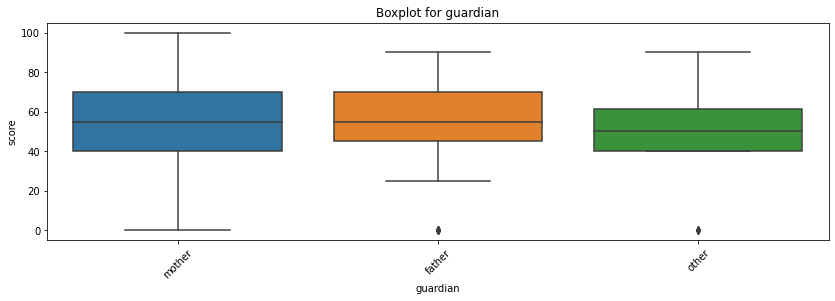

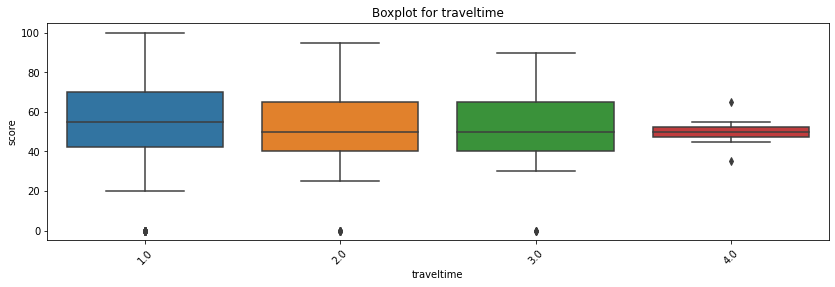

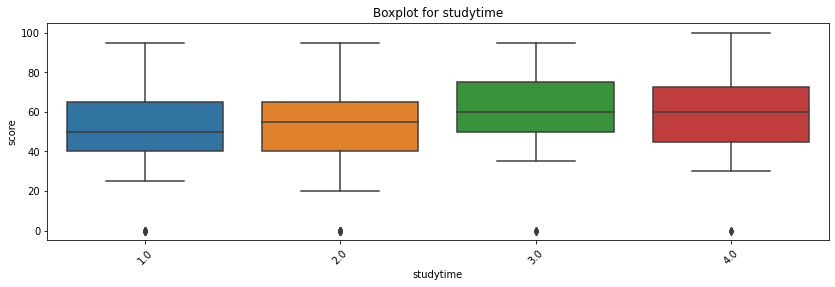

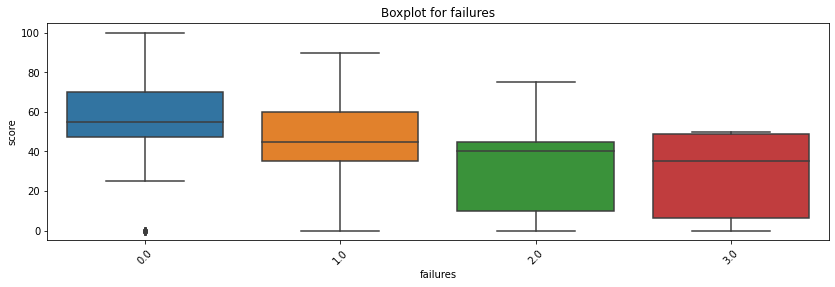

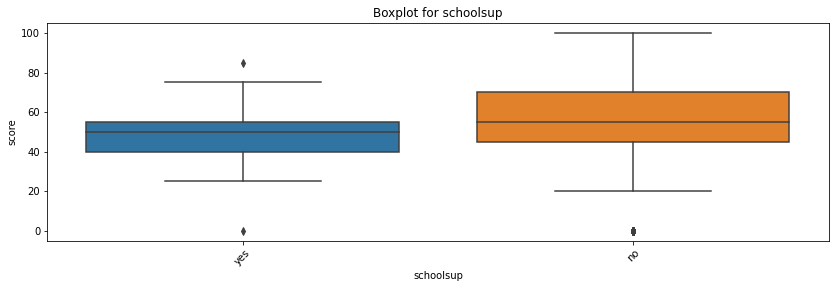

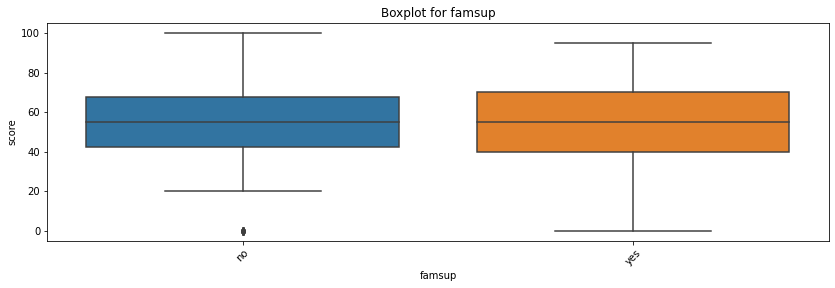

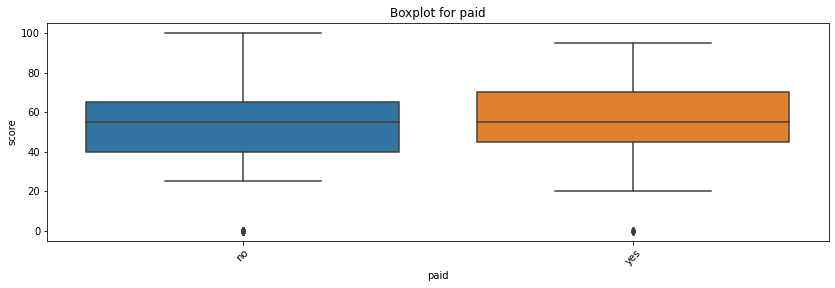

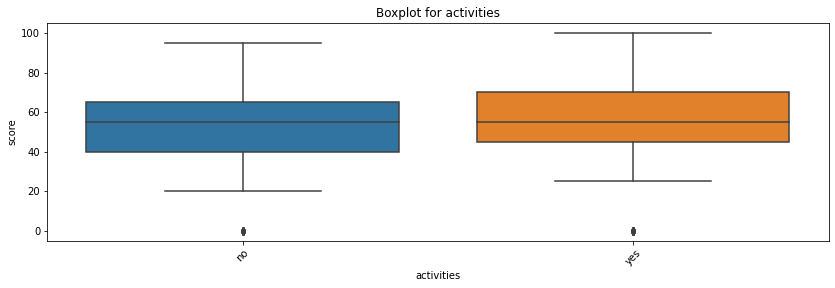

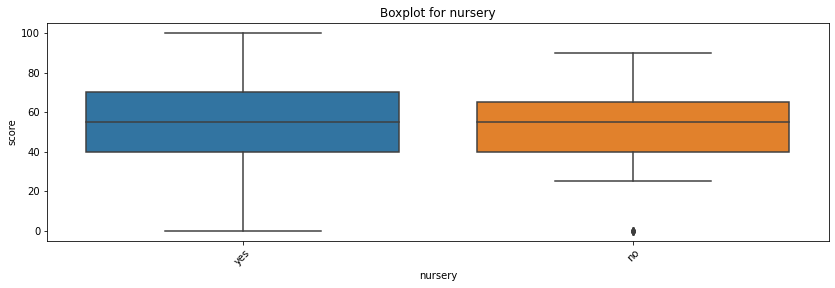

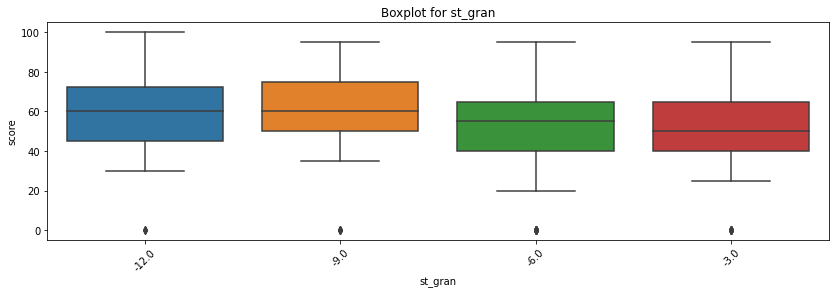

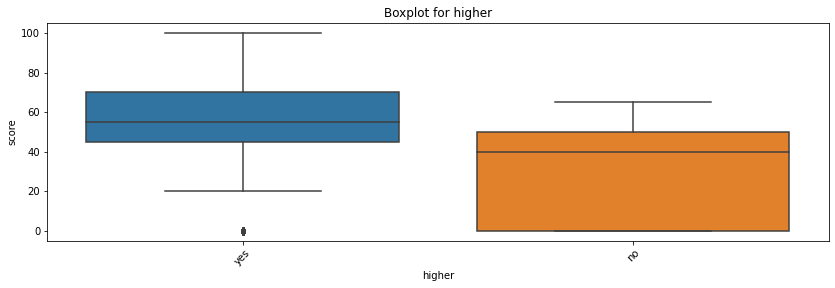

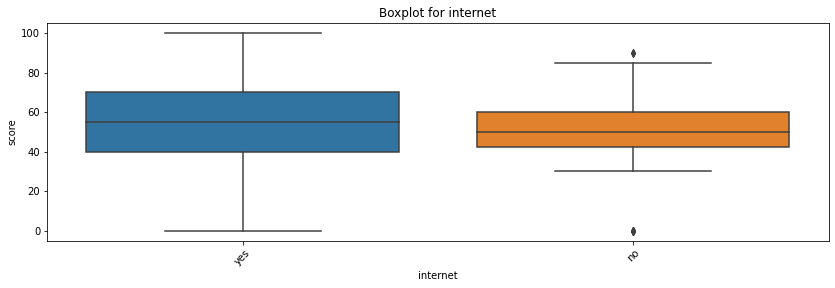

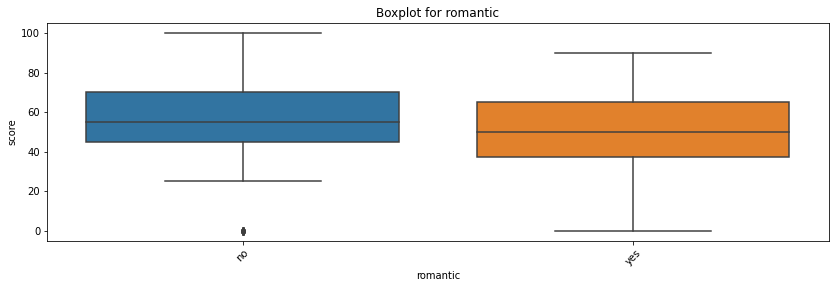

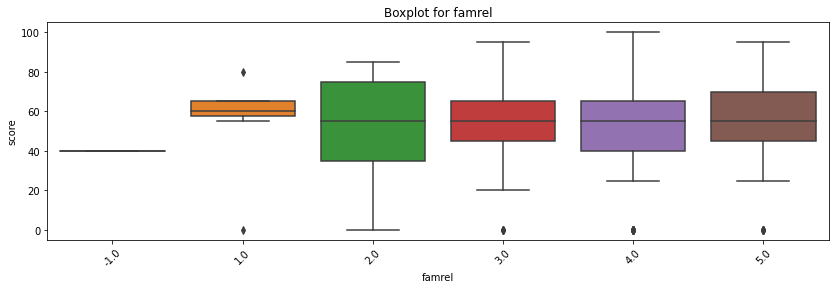

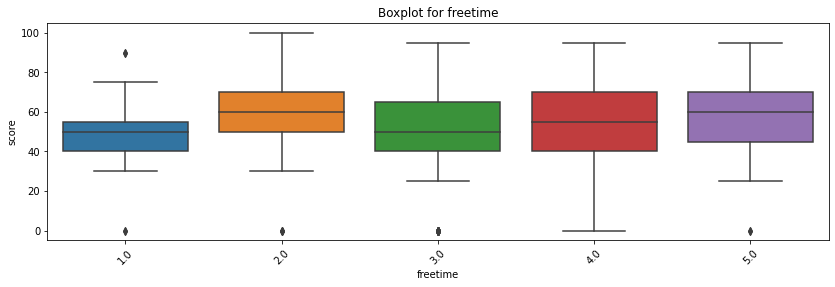

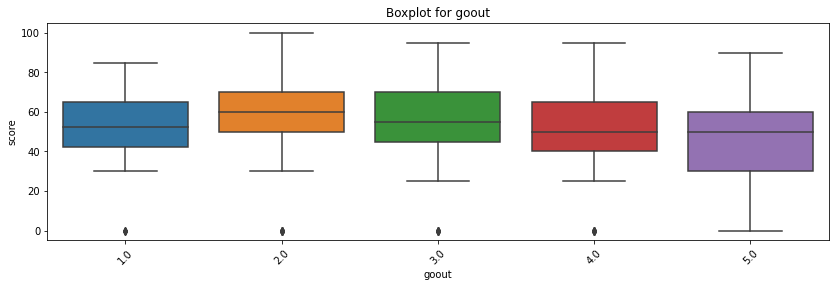

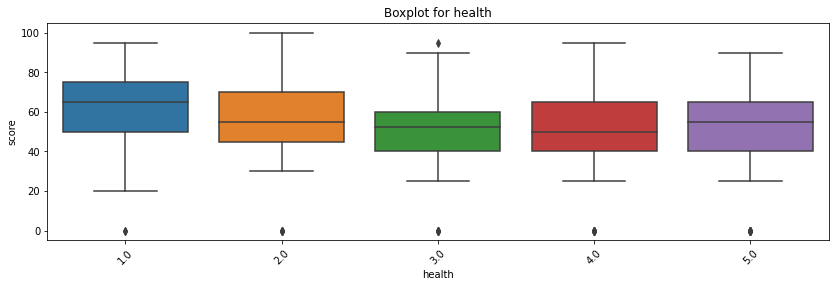

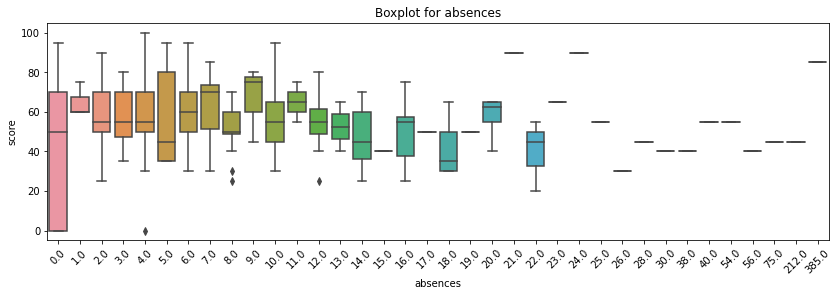

In [1727]:
#for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime','school','address']:

for data in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
             'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'st_gran', 'higher', 'internet', 
             'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
             get_boxplot(data)

## Тест Стьюдента.

Настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 

Проверим нулевую гипотезу о том, что распределения оценок студентов по различным параметрам неразличимы.

In [1728]:
for data in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
             'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'st_gran', 'higher', 'internet', 
             'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
             get_stat_dif(data)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


Как мы видим, серьёзно отличаются параметры:
address, Medu, Mjob, failures, higher, romantic, absences.
Это соотвествует и отображению данных на боксплотах.

Оставим эти переменные в датасете для дальнейшего построения модели. 

# Выводы.

Исходный датасет содержал около 5% потеряных данных.
С помощью простого анализа получилось снизить количество потерь до 0%.

Выбросов немного, что позволяет сделать вывод о том, что данные достаточно чистые.

Анализ значимых различий выделил следующие важные переменные, которые, возможно, оказывают влияние на оценку студента по математике:
address, Medu, Mjob, failures, higher, romantic, goout, absences

Также как существует значительная корреляция между Medu и Fedu можно оставить только Мedu, но я решил оставить оба параметра.
Также рекомендую изучить отдельно группу студентов получивших score=0. Эта оценка выбивается из нормального распределения и требует особого изучения(или даже исключения из модели?).


PS
Возможно, для построения модели подошли бы и дополнительные синтетические параметры: Medu+Fedu, schoolsup+famsup и тп.
Заполнение пробелов в параметре goout медианой приводит к его исключению из статистически значимых, поэтому применил доп. анализ и некое подобие регрессии.


In [1730]:
Data_for_model = stud_math.loc[:, ['address', 'Medu', 'Fedu', 'Mjob', 'failures', 'higher','romantic','goout','absences']]
Data_for_model.head()

,address,Medu,Fedu,Mjob,failures,higher,romantic,goout,absences
0,U,4.0,4.0,at_home,0.0,yes,no,4.0,6.0
1,U,1.0,1.0,at_home,0.0,yes,no,3.0,4.0
2,U,1.0,1.0,at_home,3.0,yes,no,2.0,10.0
3,U,4.0,2.0,health,0.0,yes,yes,2.0,2.0
4,U,3.0,3.0,other,0.0,yes,no,2.0,4.0


# PS
Autopep8 - не встал.... поэтому проверить автоматически на соотвествие PEP-8 не получилось....
